In [54]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import Imputer
import category_encoders as ce
import xgboost as xgb
from xgboost import \
    (XGBClassifier, cv)


In [3]:
# import dataset

data = pd.read_csv("heart.csv")
#print(data.to_string())
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [29]:
encoder = ce.OrdinalEncoder(cols= ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

data = encoder.fit_transform(data)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,2,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,2,3,138,214,0,1,108,2,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0


In [30]:
#Declare feature vector and target variable
x= data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [32]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,1,0.0,1
1,49,2,2,160,180,0,1,156,1,1.0,2
2,37,1,1,130,283,0,2,98,1,0.0,1
3,48,2,3,138,214,0,1,108,2,1.5,2
4,54,1,2,150,195,0,1,122,1,0.0,1


In [33]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [34]:
#define data dmatrix
data_dmatrix = xgb.DMatrix(data= x, label= y)

In [35]:
# split x and y into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, train_size=.7,  random_state = 0)

In [50]:
# declare parameters
params = {
     'objective':'binary:logistic',
    'alpha': 10,
    'max_depth': 4,
    'learning_rate': 1,
    'n_estimators': 100
}
# instantiate the classifier 
model = XGBClassifier(**params)

# fit the classifier to the training data
model.fit(x_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
# predict

y_pred = model.predict(x_test)

In [53]:
#check accuracy score
print('accuracy score:{0:0.4f}'.format(accuracy_score(y_test, y_pred)))

accuracy score:0.8406


k-fold Cross Validation using XGBoost

In [58]:
params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
                'max_depth': 5,
                  'alpha': 10}

xgb_cv = cv(dtrain= data_dmatrix, params= params, nfold= 3, num_boost_round= 50, early_stopping_rounds= 10, metrics= 'auc', as_pandas= True )
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.890724,0.012782,0.879940,0.026784
1,0.892445,0.005517,0.878685,0.019930
2,0.904603,0.006631,0.894122,0.014630
3,0.915174,0.006795,0.907325,0.015730
4,0.916351,0.005887,0.907664,0.013567


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

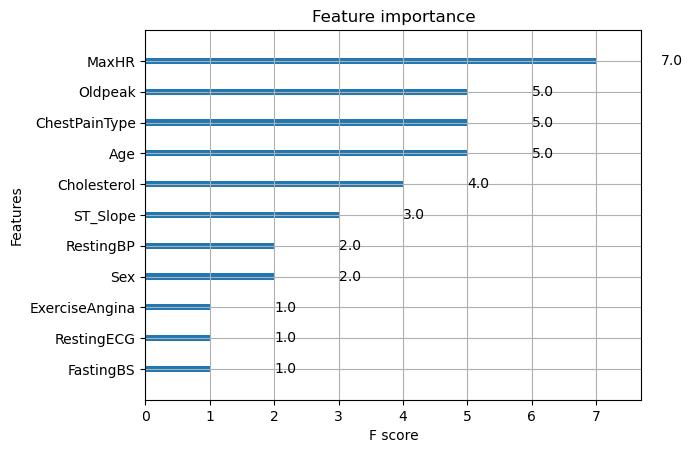

In [61]:
# Feature importance with XGBoost
xgb.plot_importance(model)